<a href="https://colab.research.google.com/github/Daisuke0209/ConversationAI/blob/master/190309_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vecを試してみる
以下の記事を参考にしました

[【Python】Word2Vecの使い方](https://qiita.com/kenta1984/items/93b64768494f971edf86)

## Google Driveとのマウントを取る

In [1]:
#Google Driveのマウントを取る
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Wikipediaのデータをダウンロード

In [0]:
!curl https://dumps.wikimedia.org/jawiki/latest/jawiki-latest-pages-articles.xml.bz2 -o jawiki-latest-pages-articles.xml.bz2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2699M  100 2699M    0     0  2019k      0  0:22:48  0:22:48 --:--:-- 2003k


### 記事本文だけを取り出すプログラムをGit Clone

In [0]:
!git clone https://github.com/attardi/wikiextractor.git

Cloning into 'wikiextractor'...
remote: Enumerating objects: 523, done.
remote: Total 523 (delta 0), reused 0 (delta 0), pack-reused 523
Receiving objects: 100% (523/523), 454.22 KiB | 8.91 MiB/s, done.
Resolving deltas: 100% (297/297), done.


### Git Cloneしたプログラムのセットアップ

In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating wikiextractor.egg-info
writing wikiextractor.egg-info/PKG-INFO
writing dependency_links to wikiextractor.egg-info/dependency_links.txt
writing top-level names to wikiextractor.egg-info/top_level.txt
writing manifest file 'wikiextractor.egg-info/SOURCES.txt'
writing manifest file 'wikiextractor.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
installing scripts to build/bdist.linux-x86_64/egg/EGG-INFO/scripts
running install_scripts
running build_scripts
creating build/scripts-3.6
copying and adjusting WikiExtractor.py -> build/scripts-3.6
changing mode of build/scripts-3.6/WikiExtractor.py from 644 to 755
creating build/bdist.linux-x86_64/egg/EGG-INFO/scripts
copying build/scripts-3.6/WikiExtractor.py -> build/bdist.linux-x86_64/egg/EGG-INFO/scri

In [0]:
!mv /content/jawiki-latest-pages-articles.xml.bz2 /content/wikiextractor

### 記事本文取り出しの実行

In [0]:
!python WikiExtractor.py jawiki-latest-pages-articles.xml.bz2

### wiki.txtというファイルにまとめる

In [0]:
!find text/ | grep wiki | awk '{system("cat "$0" >> wiki.txt")}'

### gensimライブラリのインストール

In [16]:
!pip install --upgrade gensim

    100% |████████████████████████████████| 24.2MB 1.6MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


### MeCabのインストール

In [17]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

### MeCabを用いてwiki.txtを分かち書き

In [19]:
!mecab -Owakati wiki.txt -o wiki_wakati.txt

input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE option.
input-buffer overflow. The line is split. use -b #SIZE 

### nkfコマンドのインストール

In [23]:
!sudo apt-get install nkf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  nkf
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 128 kB of archives.
After this operation, 309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 nkf amd64 1:2.1.4-1ubuntu2 [128 kB]
Fetched 128 kB in 1s (101 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package nkf.
(Reading database ... 131991 files and directories currently inst

### nkfコマンドを用いてwiki_wakati.txtをUTF-8エンコード化

In [0]:
!nkf -w --overwrite wiki_wakati.txt

### Word2Vecモデルによる学習
バカみたいに時間かかる
（３時間ぐらい）

In [0]:
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.Text8Corpus('./wiki_wakati.txt')

model = word2vec.Word2Vec(sentences, size=200, min_count=20, window=15)
model.save("./wiki.model")

### Word2Vecを試してみる

### モデルの読み込み

In [0]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("./wiki.model")

### 有名な王様-男+女=?のやつ

In [72]:
results = model.wv.most_similar(positive=['王様','女'],negative=['男'])
for result in results:
    print(result)

('お姫様', 0.5922868251800537)
('白雪姫', 0.578365683555603)
('女王', 0.5745111703872681)
('貴婦人', 0.5665320158004761)
('王女', 0.5493149757385254)
('お姫さま', 0.5341925621032715)
('召使い', 0.5265882015228271)
('魔女', 0.5212649703025818)
('王妃', 0.5163649320602417)
('召使', 0.512244462966919)


###類似語検索

In [71]:
results = model.wv.most_similar(positive=['ピカチュウ'])
for result in results:
    print(result)

('ポケモン', 0.8082786798477173)
('サトシ', 0.7675457000732422)
('ニャース', 0.739279568195343)
('イーブイ', 0.7332701086997986)
('ポッチャマ', 0.7044609189033508)
('コジロウ', 0.6962922811508179)
('リザードン', 0.6863342523574829)
('ミュウツー', 0.6779522895812988)
('ミジュマル', 0.675520658493042)
('ゲッコウガ', 0.6728000044822693)


In [73]:
import MeCab
from gensim.models import word2vec
import numpy as np

mt = MeCab.Tagger('')
mt.parse('')
model = word2vec.Word2Vec.load("./wiki.model")

# テキストのベクトルを計算
def get_vector(text):
    sum_vec = np.zeros(200)
    word_count = 0
    node = mt.parseToNode(text)
    while node:
        fields = node.feature.split(",")
        # 名詞、動詞、形容詞に限定
        if fields[0] == '名詞' or fields[0] == '動詞' or fields[0] == '形容詞':
            sum_vec += model.wv[node.surface]
            word_count += 1
        node = node.next

    return sum_vec / word_count


# cos類似度を計算
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

2019-03-10 07:12:48,694 : INFO : loading Word2Vec object from ./wiki.model
2019-03-10 07:12:49,583 : INFO : loading wv recursively from ./wiki.model.wv.* with mmap=None
2019-03-10 07:12:49,584 : INFO : loading vectors from ./wiki.model.wv.vectors.npy with mmap=None
2019-03-10 07:12:49,849 : INFO : setting ignored attribute vectors_norm to None
2019-03-10 07:12:49,850 : INFO : loading vocabulary recursively from ./wiki.model.vocabulary.* with mmap=None
2019-03-10 07:12:49,858 : INFO : loading trainables recursively from ./wiki.model.trainables.* with mmap=None
2019-03-10 07:12:49,859 : INFO : loading syn1neg from ./wiki.model.trainables.syn1neg.npy with mmap=None
2019-03-10 07:12:50,152 : INFO : setting ignored attribute cum_table to None
2019-03-10 07:12:50,153 : INFO : loaded ./wiki.model


In [0]:
emotions = ['喜び','信頼','恐れ','驚き','悲しみ','嫌悪','怒り','期待']
text = '今日が初出勤日！一日でも早く認められるよう頑張ります！'
text_v = get_vector(text)
score = []
for i in range(8):
  v = get_vector(emotions[i])
  score.append(cos_sim(v,text_v))
  
#maxを1に
score = score/np.max(score)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

emotions_plot = ['Joy','Trust','Fear','Surprise','Sadness','Disgust','Anger','Anticipation']

def plot_polar(labels, values, imgname):
    angles = np.linspace(0, 2 * np.pi, len(labels) + 1, endpoint=True)
    values = np.concatenate((values, [values[0]]))  # 閉じた多角形にする
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, 'o-')  # 外枠
    ax.fill(angles, values, alpha=0.25)  # 塗りつぶし
    ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)  # 軸ラベル
    ax.set_rlim(0 ,1)
    fig.savefig(imgname)
    plt.close(fig)

labels = emotions_plot
values = [1,1,1,1,1,1,1,1]
plot_polar(labels, score, "radar.png")

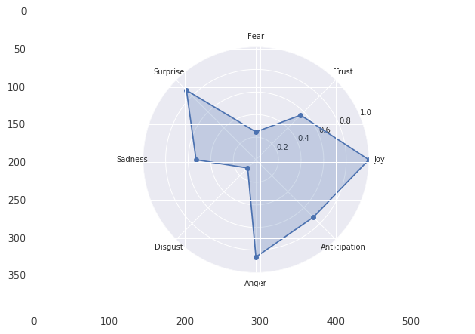

In [97]:
from PIL import Image

im = Image.open("radar.png")
im_list=np.array(im)
plt.imshow(im_list)
plt.show()